In [1]:
import numpy as np
import copy
from PIL import Image
import open3d as o3d
import matplotlib.pyplot as plt
from magpie.perception import pcd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [2]:
from magpie import realsense_wrapper as real
rsc = real.RealSense()
rsc.initConnection()

In [3]:
from magpie.perception.label_owlvit import LabelOWLViT
path = "google/owlvit-base-patch32"
label_vit = LabelOWLViT(path)

In [15]:
from magpie.perception.mask_sam import MaskSAM
ckpt = "/home/will/workspace/owlvit_segment_anything/sam_vit_h_4b8939.pth"
mask_sam = MaskSAM(ckpt)

[445.20769119262695, 0.943225622177124, 655.5901908874512, 181.09984517097473]
[137.63741970062256, 97.50327050685883, 277.07380771636963, 216.3078886270523]
[754.287919998169, 130.4976224899292, 955.7601451873779, 311.0327339172363]
[832.5335597991943, 242.15345084667206, 994.309549331665, 380.5635577440262]
[113.99057388305664, 171.18221640586853, 372.9940605163574, 422.9790937900543]
[349.5113754272461, 185.68095088005066, 571.0792922973633, 424.19286847114563]
[935.6873989105225, 321.5606027841568, 1144.4183444976807, 496.00030839443207]
[420.1651382446289, 376.1610174179077, 659.3386459350586, 585.6181955337524]
[821.7471218109131, 523.7689554691315, 989.4415378570557, 651.8740689754486]
[290.82430839538574, 577.6211196184158, 523.9870929718018, 720.4703682661057]


([([445.20769119262695,
    0.943225622177124,
    655.5901908874512,
    181.09984517097473],
   'onion'),
  ([137.63741970062256,
    97.50327050685883,
    277.07380771636963,
    216.3078886270523],
   'pear'),
  ([754.287919998169, 130.4976224899292, 955.7601451873779, 311.0327339172363],
   'onion'),
  ([832.5335597991943,
    242.15345084667206,
    994.309549331665,
    380.5635577440262],
   'onion'),
  ([113.99057388305664,
    171.18221640586853,
    372.9940605163574,
    422.9790937900543],
   'pear'),
  ([349.5113754272461,
    185.68095088005066,
    571.0792922973633,
    424.19286847114563],
   'onion'),
  ([935.6873989105225,
    321.5606027841568,
    1144.4183444976807,
    496.00030839443207],
   'onion'),
  ([420.1651382446289,
    376.1610174179077,
    659.3386459350586,
    585.6181955337524],
   'pear'),
  ([821.7471218109131,
    523.7689554691315,
    989.4415378570557,
    651.8740689754486],
   'lime'),
  ([290.82430839538574,
    577.6211196184158,
    52

[2337:344][8589] (stun_port.cc:96): Binding request timed out from 192.168.0.x:40128 (enp3s0)


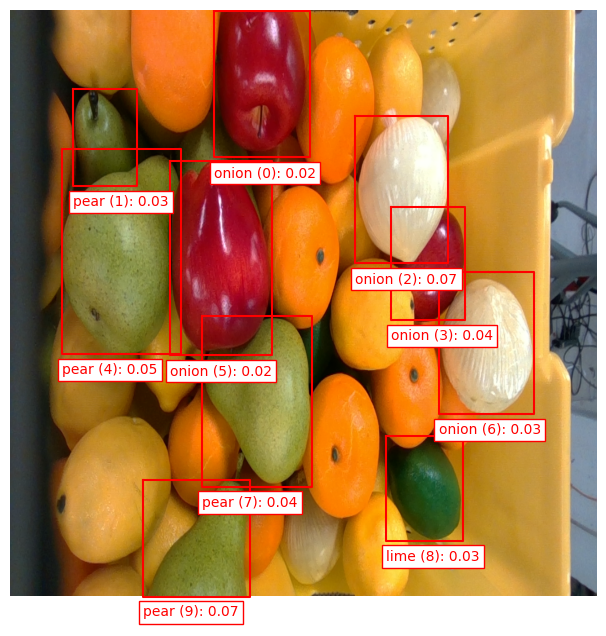

In [104]:
p, rgbd_image = rsc.getPCD()
image = np.array(rgbd_image.color)
queries = ["a photo of an apple", "a photo of a lemon", "a photo of a lime", "a photo of a pear", "a photo of a onion"]
abbrevq = ["apple", "lemon", "lime", "pear", "onion"]
label_vit.set_threshold(0.02)
label_vit.label(image, queries, abbrevq, plot=True)


In [121]:
index = 8
color_copy = copy.deepcopy(rgbd_image.color)
depth_copy = copy.deepcopy(rgbd_image.depth)
dm, rm, imgm = pcd.retrieve_mask_from_image_crop(label_vit.boxes[index][0], rgbd_image)
cpcd = pcd.crop_and_denoise_pcd(dm, rgbd_image, rsc, NB=5)
# mc = cpcd.compute_mean_and_covariance()
# grasp_pose = [mc[0][1], -mc[0][0], mc[0][2]]
pcd.display_world_nb(cpcd)
# pcd.display_world(cpcd)

# despite by my best efforts, I cannot use rgbd_copy. 
# need to reassign color, depth value copies to rgbd_image
# in order to view other crops without having to retake an image
rgbd_image.color = color_copy
rgbd_image.depth = depth_copy


[Open3D INFO] Window window_5 created.


WebVisualizer(window_uid='window_5')

[Open3D INFO] Sending init frames to window_5.


[2512:049][8589] (stun_port.cc:96): Binding request timed out from 192.168.0.x:41805 (enp3s0)
[2516:351][8589] (stun_port.cc:96): Binding request timed out from 192.168.0.x:42260 (enp3s0)
